In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math
import batman
# Disclaimer: Most of this is unoriginal and ripped directly from a random online tutorial.

In [16]:
data_planet = pd.read_excel("ep206103150.xlsx")

In [17]:
# data_planet.head()

# I will comment out a lot of unnecessary data.

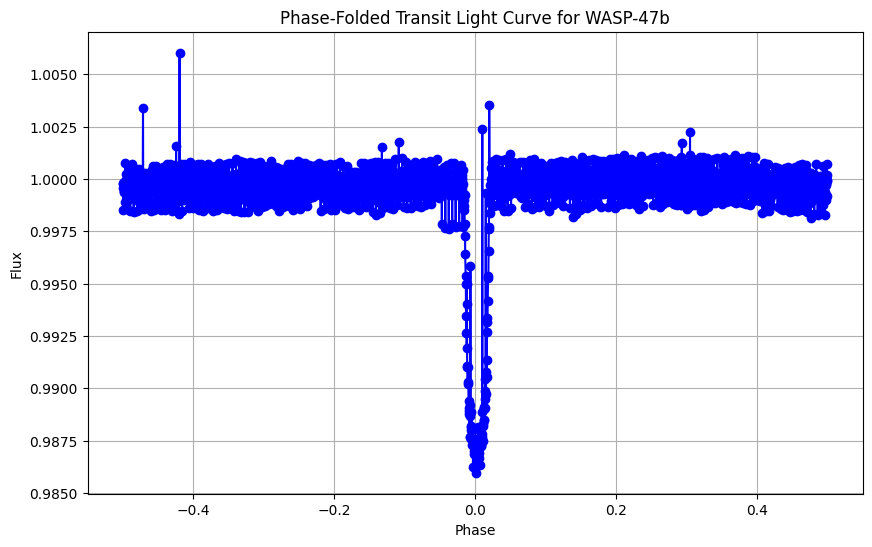

In [18]:
time = data_planet['time']
flux = data_planet['flux']
period = 4.1591

phase = ((time - time.min()) / period) % 1

# Adjusts phase to center the curve
phase_adjusted = phase - 0.845
phase_adjusted = np.where(phase_adjusted < -0.5, phase_adjusted + 1, phase_adjusted)
phase_adjusted = np.where(phase_adjusted > 0.5, phase_adjusted - 1, phase_adjusted)

# Sorts the data so the plot looks cleaner
sorted_indices = np.argsort(phase_adjusted)
sorted_phase = phase_adjusted[sorted_indices]
sorted_flux = flux[sorted_indices]

# Actual plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_phase, sorted_flux, marker='o', linestyle='-', color='b')
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.title('Phase-Folded Transit Light Curve for WASP-47b')
plt.grid(True)
plt.show()


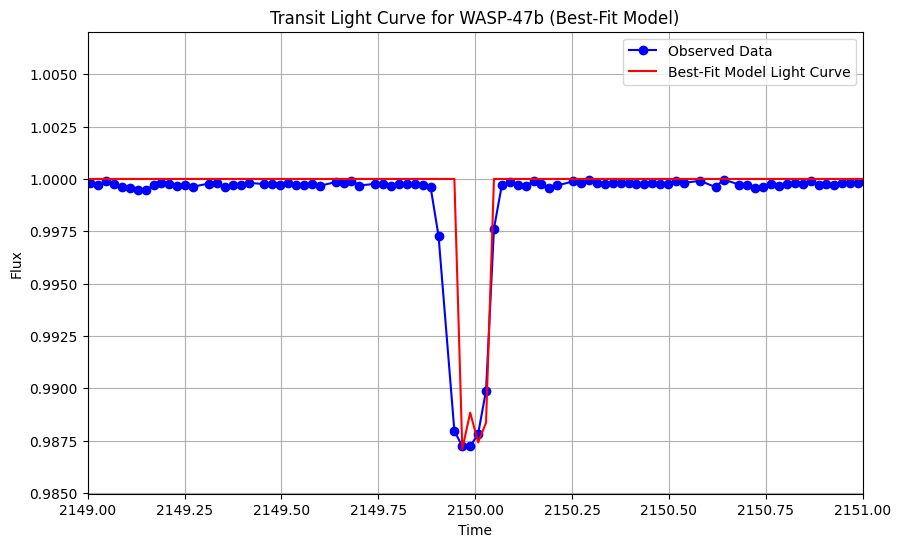

Best-Fit Parameters:
Transit Center Time (t0): 2150.0
Planet-to-Star Radius Ratio (rp): 0.24819310817136842
Limb Darkening Coefficients (u1, u2): [4.8802669535124785, -5.35017984764634]


In [19]:
# Define the transit model parameters
params = batman.TransitParams()
params.t0 = 2150.00  # Initial guess for transit center time
params.per = 4.1591  # Orbital period (fixed)
params.rp = 0.1  # Initial guess for planet-to-star radius ratio
params.a = 15  # Semi-major axis (fixed, assuming stellar radius is 1)
params.inc = 87.  # Orbital inclination (fixed)
params.ecc = 0.  # Eccentricity (fixed)
params.w = 90.  # Argument of periastron (fixed)
params.limb_dark = "quadratic"  # Limb darkening model
params.u = [0.1, 0.3]  # Initial guess for limb darkening coefficients

# Initialize the BATMAN transit model
m = batman.TransitModel(params, time_data)

# Define a function to minimize, which calculates the residuals
def objective(p):
    # Update parameters
    params.rp, params.u[0], params.u[1] = p

    # Calculate the model light curve
    flux_model = m.light_curve(params)

    # Calculate residuals
    residuals = flux_data - flux_model

    # Return the sum of squared residuals
    return np.sum(residuals**2)

# Perform the optimization to find best-fit parameters
initial_guess = [params.rp, params.u[0], params.u[1]]
result = minimize(objective, initial_guess, method='Nelder-Mead')

# Get the best-fit parameters
best_fit_params = result.x
params.rp, params.u[0], params.u[1] = best_fit_params

# Reinitialize the transit model with best-fit parameters
m = batman.TransitModel(params, time_data)
flux_model = m.light_curve(params)

# Plot the observed data and the best-fit model
plt.figure(figsize=(10, 6))
plt.plot(time_data, flux_data, marker='o', linestyle='-', color='b', label='Observed Data')
plt.plot(time_data, flux_model, color='r', label='Best-Fit Model Light Curve')
plt.xlabel('Time')
plt.xlim(2149, 2151)
plt.ylabel('Flux')
plt.title('Transit Light Curve for WASP-47b (Best-Fit Model)')
plt.legend()
plt.grid(True)
plt.show()

# Display the best-fit parameters
print("Best-Fit Parameters:")
print("Transit Center Time (t0):", params.t0)
print("Planet-to-Star Radius Ratio (rp):", params.rp)
print("Limb Darkening Coefficients (u1, u2):", params.u)


In [20]:


# Load data
#data_planet = pd.read_excel("ep206103150.xlsx")
#time_data = np.array(data_planet['time'])
#flux_data = np.array(data_planet['flux'])

# Define the transit model parameters
#params = batman.TransitParams()
#params.t0 = 2150.00  # Transit center time, adjusted to match your requirement
#params.per = 4.1591  # Orbital period (fixed)
#params.rp = 0.1  # Initial guess for planet-to-star radius ratio (unchanged)
#params.a = 15  # Semi-major axis (fixed, assuming stellar radius is 1)
#params.inc = 87.  # Orbital inclination (fixed)
#params.ecc = 0.  # Eccentricity (fixed)
#params.w = 90.  # Argument of periastron (fixed)

# Adjust the limb darkening model to achieve an earlier ingress
#params.limb_dark = "quadratic"
# Limb darkening coefficients for a typical star (you should adjust these based on your star's properties)
#params.u = [0.7, 0.2]  # Adjusted to achieve an earlier ingress

# Initialize the BATMAN transit model
#m = batman.TransitModel(params, time_data)

# Define a function to minimize, which calculates the residuals
#def objective(p):
    # Update parameters
  #  params.u[0], params.u[1] = p

    # Calculate the model light curve
#    flux_model = m.light_curve(params)

    # Calculate residuals
 #   residuals = flux_data - flux_model

    # Return the sum of squared residuals
 #   return np.sum(residuals**2)

# Perform the optimization to find best-fit limb darkening coefficients
#initial_guess = [params.u[0], params.u[1]]
#result = minimize(objective, initial_guess, method='Nelder-Mead')

# Get the best-fit limb darkening coefficients
# These are the ones Dr. Becker wants changed
#best_fit_coefficients = result.x
#params.u[0], params.u[1] = best_fit_coefficients

# Reinitialize the transit model with best-fit coefficients
#m = batman.TransitModel(params, time_data)
#flux_model = m.light_curve(params)

# Plot the observed data and the best-fit model
#plt.figure(figsize=(10, 6))
#plt.plot(time_data, flux_data, marker='o', linestyle='-', color='b', label='Observed Data')
#plt.plot(time_data, flux_model, color='r', label='Best-Fit Model Light Curve')
#plt.xlabel('Time')
#plt.ylabel('Flux')
#plt.title('Transit Light Curve for WASP-47b (Best-Fit Model with Adjusted Limb Darkening)')
#plt.legend()
#plt.xlim(2149, 2151)  # Limit the x-axis
#plt.grid(True)
#plt.show()

# Display the best-fit limb darkening coefficients
#print("Best-Fit Limb Darkening Coefficients (u1, u2):", params.u)


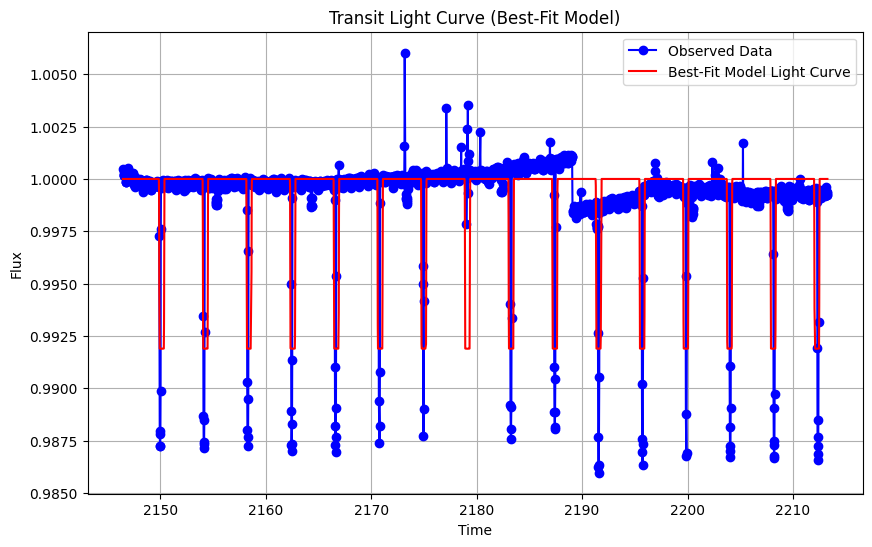

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import batman
from scipy.optimize import minimize
from scipy.signal import find_peaks

# Load data (provide the path to your dataset)
data_planet = pd.read_excel("ep206103150.xlsx")
time_data = np.array(data_planet['time'])
flux_data = np.array(data_planet['flux'])

# Function to detect the first dip in the data
def find_first_dip(flux, prominence=0.01):
    peaks, _ = find_peaks(-flux, prominence=prominence)
    if peaks.any():
        return peaks[0]
    return None

# Define a function to fit transit parameters and generate the model light curve
def fit_transit_parameters(time, flux, initial_params):
    # Detect the first dip
    first_dip_index = find_first_dip(flux)

    if first_dip_index is not None:
        # Use the first dip as the initial transit center time
        initial_params['t0'] = time[first_dip_index]

    # Generate a finer time grid during transit for a smoother model
    time_fine = np.linspace(time[0], time[-1], len(time) * 10)
    
    # Define the transit model parameters
    params = batman.TransitParams()
    params.t0 = initial_params['t0']
    params.per = initial_params['per']
    params.rp = initial_params['rp']
    params.a = (params.per**2)**(1/3)
    params.inc = initial_params['inc']
    params.ecc = initial_params['ecc']
    params.w = initial_params['w']
    params.limb_dark = "quadratic"
    params.u = [initial_params['u1'], initial_params['u2']]

    # Initialize the BATMAN transit model
    m = batman.TransitModel(params, time_fine)

    # Define a function to minimize, which calculates the residuals
    def objective(p):
        # Update parameters
        params.t0, params.rp, params.per, params.a, params.u[0], params.u[1] = p

        # Initialize the BATMAN transit model with updated parameters
        m = batman.TransitModel(params, time_fine)

        # Calculate the model light curve
        flux_model = m.light_curve(params)

        # Interpolate the model to match the original time grid
        flux_model = np.interp(time, time_fine, flux_model)

        # Calculate residuals
        residuals = flux - flux_model

        # Return the sum of squared residuals
        return np.sum(residuals**2)

    # Perform the optimization to find best-fit parameters (t0, rp, per, a, u1, u2)
    initial_guess = [params.t0, params.rp, params.per, params.a, params.u[0], params.u[1]]
    bounds = [(params.t0 - 1, params.t0 + 1), (params.rp * 0.9, params.rp * 1.1),
              (params.per * 0.9, params.per * 1.1), (params.a * 0.9, params.a * 1.1),
              (0.0, 1.0), (0.0, 1.0)]  # Bounds for parameters
    result = minimize(objective, initial_guess, method='Nelder-Mead', bounds=bounds)

    # Get the best-fit parameters
    best_fit_params = result.x
    params.t0, params.rp, params.per, params.a, params.u[0], params.u[1] = best_fit_params

    # Initialize the BATMAN transit model with best-fit parameters
    m = batman.TransitModel(params, time_fine)
    flux_model = m.light_curve(params)

    # Interpolate the model to match the original time grid
    flux_model = np.interp(time, time_fine, flux_model)

    return flux_model

# Initial parameters (provide initial guesses for the transit parameters)
initial_params = {
    't0': 2150.00,
    'per': 4.1591,
    'rp': 0.1,
    'inc': 87.0,
    'ecc': 0.0,
    'w': 90.0,
    'u1': 0.7,
    'u2': 0.2
}

# Fit the transit parameters and generate the model light curve
model = fit_transit_parameters(time_data, flux_data, initial_params)

# Plot the observed data and the best-fit model
plt.figure(figsize=(10, 6))
plt.plot(time_data, flux_data, marker='o', linestyle='-', color='b', label='Observed Data')
plt.plot(time_data, model, color='r', label='Best-Fit Model Light Curve')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Transit Light Curve (Best-Fit Model)')
plt.legend()
plt.grid(True)
plt.show()
